In [3]:
import pandas as pd
import pandas_datareader as pdr # IF NECESSARY, from terminal: pip install pandas_datareader 
import datetime
import datadotworld as dw # follow instructions for installing and using dw in accompanying lecture
import numpy as np

## My turn: What were the most popular male and female names in each year? 


In [4]:
# get the data
baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']

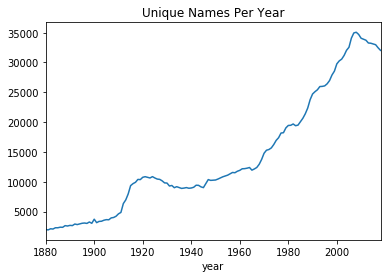

In [5]:
# a silly observation
(baby_names.pivot_table(index='year',values='name',aggfunc='count') # count unique names per year
    .plot.line(title='Unique Names Per Year',legend=False) # plot it, uses panda
) 


In [6]:
(baby_names.sort_values(['year','sex','count'],ascending=False) # sort descending so most popular name first
     .groupby(['year','sex']) # group by year and gender 
     .agg(lambda x: x.iloc[0]) # keep the first (most popular) name each year
     ['name'] # keep only the name variable
     .unstack() # format wide
     [-20:]
)

sex,F,M
year,,
1999,Emily,Jacob
2000,Emily,Jacob
2001,Emily,Jacob
2002,Emily,Jacob
2003,Emily,Jacob
2004,Emily,Jacob
2005,Emily,Jacob
2006,Emily,Jacob
2007,Emily,Jacob


### A side lesson: What on earth is **`lambda`**? 

Can you survive without learning `lambda`? Yes. 

But knowing `lambda` will make you a more powerful programmer, because it lets you define functions very quickly. And this is very useful! For example, the `agg` function can apply any function, not just built-in ones, and sometimes you'll want to use non built-in functions!

So, generally, the syntax is `<fcn_name> = lambda <argument> : <function>`.

In [7]:
my_fcn = lambda a : a*5 # if I call my_fcn(7), python will set a=7, then evalute the function a*5
print(my_fcn(7))

35


Now, in the example above inside `agg()` I never named the function. That's because it's unnecessary in that context, python knows to immediately call it.

### Maybe you say "I hate that and will never ever write a lambda. How can I accomplish the problem above anyways?"

Well, I'm sorry to hear that! Here is what you could do:

In [9]:
def return_first_element(df):
    return df.iloc[0]

(baby_names.sort_values(['year','sex','count'],ascending=False) # sort descending so most popular name first
     .groupby(['year','sex']) # group by year and gender 
     .agg(return_first_element) # keep the first (most popular) name each year
     ['name'] # keep only the name variable
     .unstack() # format wide
     [-20:]
)

sex,F,M
year,,
1999,Emily,Jacob
2000,Emily,Jacob
2001,Emily,Jacob
2002,Emily,Jacob
2003,Emily,Jacob
2004,Emily,Jacob
2005,Emily,Jacob
2006,Emily,Jacob
2007,Emily,Jacob


# My turn: Can we use the last letter of a name to predict the sex of the baby?

In [ ]:
(baby_names.query('year >= 1970') # let's focus on the last 50 years, maybe old-timey people had different naming rules
           .assign(last_letter = baby_names['name'].str[-1]) # get the last letter of each name string
           .assign(male = baby_names['sex'] == 'M') # = 1 if male, 0 else
           .assign(female= baby_names['sex'] == 'F') # = 1 if female, 0 else
           .pivot_table(index='last_letter',values=['male','female']) # average of male & female variables --> % of each
           .sort_values('male') # so the figure is in order
           .plot.barh(figsize=(7,7), # make it a bit bigger 
           title = 'Gender fraction by last letter in name \n \n "Feminine letters": A,H,E,I,Y')
           .set_ylabel("<-----Femine letters                         Masculine letters----->")
)

# Your turn: Practice 

Try each one alone, then check and compare with the person next to you.

There are many ways to solve each, so if your approaches differ, explain it to each other!

## Example 1

In [ ]:
start = datetime.datetime(2010, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2013, 1, 27)
macro_df = pdr.data.DataReader(['GDP','CPIAUCSL'], 'fred', start, end)

- Q0: Do each of the four new golden rules for initial data exploration, from the lecture.
- Q1: What is the second series above?
- Q2: What is the frequency of the series?
- Q3: What is the average ANNUAL GDP, based on the data?

In [ ]:
# do your work here

## Example 2

- Q4: Download the annual *real* gdp from 1960 to 2018 from FRED and compute the average annual percent change
- Q5: Compute the average gdp percent change within *each decade*


In [ ]:
# do your work here

## Example 3

First, I'll load January data on unemployment, the Case-Shiller housing index, and median household income in three states (CA/MI/PA). 

In [ ]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
print("\n\n DATA BEFORE FORMATTING: \n\n")
print(macro_data[:20]) # see how the data looks now? ugly variable names, but its an annual dataset at least
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])
print("\n\n DATA AFTER FORMATTING: \n\n")
print(macro_data[:20]) # this is a dataset that is "wide", and now 
                       # the column variable names have 2 levels - var name, 
                       # and unit/state that variable applies to


- Q6: for each decade and state, report the average annual CHANGE (level, not percent) in unemployment
- Q7: for each decade and state, report the average annual PERCENT CHANGE in house prices and household income

In [ ]:
# do your work here